In [2]:
#HOMEWORK 1

#general imports
from sklearn import datasets
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import statsmodels.formula.api as smf
#from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
plt.show()

print 'imports done'

imports done


In [3]:
#upload Hurricane data (Hdat), give option to append dataset with recent US Hurricane data

def beginning():
    start = raw_input('Press ENTER to upload the hurric_Named csv file or "q" then ENTER" to quit: \n')
    Hdat = pd.read_csv("hurricNamed.csv")
    return Hdat, start

Hdat, start = beginning()

if start == 'q':
    print 'Goodbye'
    quit=1
elif start == 'Q':
    print 'Goodbye'
    quit=1
else:
    n = raw_input('To add US Hurricane data since 2011, press "1" then ENTER.  To analyze only the csv file data, press "2" then ENTER: \n')
    quit=0

#add data from recent year's (3)hurricanes, taken from
# https://www.wunderground.com/hurricane/atlantic/2016/Arthur
#and
# https://en.wikipedia.org/wiki/Hurricane_Arthur , first adding 2 observations, next appending the third obs
#(I set damage dollars normalized-damage-dollar variables equal to the raw damage numbers for these new observations
#which range in years from 2014 to 2016)

loop_breaker = 0
if quit == 0:
    while True:
        if n == 'q':
            print 'Goodbye'
            break
        elif n == '1':
            new_data=pd.DataFrame({'Name' : ['Arthur', 'Hermine'], 'Year' : [2014, 2016], 'LF.WindsMPH' : [100, 80],
                           'LF.PressureMB' : [973, 981], 'BaseDamage' : [22.7, 550], 'NDAM2014' : [22.7, 550],
                           'AffectedStates' : ['NC', 'FL,GA,SC'], 'firstLF' : ['2014-07-04', '2016-09-02'],
                           'deaths' : [0, 5], 'mf' : ['m', 'f'], 'BaseDam2014' : [22.7, 550], 'LF.times' : [1,1]})

            #displaying ability to append a data set with a new observation using a dictionary
            nd2 = pd.DataFrame({'Name' : ['Matthew'], 'Year' : [2016], 'LF.WindsMPH' : [120], 'LF.PressureMB' : [938],
                        'BaseDamage' : [10000], 'NDAM2014' : [10000], 'AffectedStates' : ['FL,GA,SC,NC'],
                        'firstLF' : ['2016-10-06'], 'deaths' : [47], 'mf' : ['m'], 'BaseDam2014' : [10000],
                        'LF.times' : [1]})
            new_data=new_data.append(nd2)

            #merge new data with uploaded data, md = merged data
            md = pd.DataFrame(Hdat)
            #drop unnecessary independent var
            md.drop(['Unnamed: 0'], axis=1, inplace=True)

            ######## combine the datasets
            md=md.append(new_data, ignore_index=True)

            break

        elif n == '2':
            #simply duplicate dataset for manipulation and analysis
            md = pd.DataFrame(Hdat)
            #drop unnecessary independent var
            md.drop(['Unnamed: 0'], axis=1, inplace=True)
            break
        elif loop_breaker < 5:
            n = raw_input('Try again, or press "q" then ENTER to quit: \n')
            loop_breaker+=1
        else:
            print 'too many bad clicks, goodbye %d' % loop_breaker
            break

    #remove periods from column names for coding purposes
    md = md.rename(index=str, columns={"LF.WindsMPH": "WindLF", "LF.PressureMB": "BPressLF", 'LF.times' : 'QLF'})

    #re-arrange columns more neatly
    cols1 = ['Year','Name', 'deaths', 'BaseDamage',  'WindLF', 'BPressLF']
    cols= ['Year','Name', 'deaths', 'BaseDamage',  'WindLF', 'BPressLF']  + [col for col in md if col not in cols1]
    md = md[cols]

    #parse data for nulls
    nulls=md.isnull().sum().sum()

    if n=='q':
        print 'Goodbye.'
    else:
        print 'Data containing %i rows and %i columns has been successfully uploaded' % (len(md), len(list(md)))
        print 'There are %i null observations in the set' % nulls
        #check data types of each column
##################################################################################################################


Press ENTER to upload the hurric_Named csv file or "q" then ENTER" to quit: 

To add US Hurricane data since 2011, press "1" then ENTER.  To analyze only the csv file data, press "2" then ENTER: 
1
Data containing 97 rows and 12 columns has been successfully uploaded
There are 0 null observations in the set


In [4]:
###### Create new variables
#decade dummies
md["fifties"] = md['Year'].apply(lambda x: True if (x < 1960) & (x > 1949) else False)
md["sixties"] = md['Year'].apply(lambda x: True if (x < 1970) & (x > 1959) else False)
md["seventies"] = md['Year'].apply(lambda x: True if (x < 1980) & (x > 1969) else False)
md["eighties"] = md['Year'].apply(lambda x: True if (x < 1990) & (x > 1979) else False)
md["nineties"] = md['Year'].apply(lambda x: True if (x < 2000) & (x > 1989) else False)
md["dub_oes"] = md['Year'].apply(lambda x: True if (x < 2010) & (x > 1999) else False)
md["teens"] = md['Year'].apply(lambda x: True if x > 2000 else False)

#categorize wind strength and pressure into quintiles
five=157
four=130
three=111
two=96
one=74
md.ix[(md.WindLF>=five), 'hurricane_category'] = 5
md.ix[(md.WindLF<five)&(md.WindLF>=four), 'hurricane_category'] = 4
md.ix[(md.WindLF<four)&(md.WindLF>=three), 'hurricane_category'] = 3
md.ix[(md.WindLF<three)&(md.WindLF>=two), 'hurricane_category'] = 2
md.ix[(md.WindLF<two)&(md.WindLF>=one), 'hurricane_category'] = 1

#take inverse of Barometric pressure such that fifth quintiile is lowest group
md.ix[:, 'inv_bp'] = 1/md.BPressLF

md['Barometric_Pressure_Quintile'] = pd.qcut(md['inv_bp'], 5, labels=False)
md.ix[:,'Barometric_Pressure_Quintile']+=1

#decade categorical
md.ix[md.fifties==1, 'decade']='1950s'
md.ix[md.sixties==1, 'decade']='1960s'
md.ix[md.seventies==1, 'decade']='1970s'
md.ix[md.eighties==1, 'decade']='1980s'
md.ix[md.nineties==1, 'decade']='1990s'
md.ix[md.dub_oes==1, 'decade']='2000s'
md.ix[md.teens==1, 'decade']='2010s'

print 'Data has successfully been appended with categorical variables.'
md.tail()

Data has successfully been appended with categorical variables.


,Year,Name,deaths,BaseDamage,WindLF,BPressLF,AffectedStates,BaseDam2014,QLF,NDAM2014,...,sixties,seventies,eighties,nineties,dub_oes,teens,hurricane_category,inv_bp,Barometric_Pressure_Quintile,decade
92,2012,Isaac,5,2350.0,80,966,LA,2423.347300,1,2400.0,...,False,False,False,False,False,True,1.0,0.001035,3,2010s
93,2012,Sandy,159,50000.0,75,942,NY,51560.580851,1,52270.0,...,False,False,False,False,False,True,1.0,0.001062,5,2010s
94,2014,Arthur,0,22.7,100,973,NC,22.700000,1,22.7,...,False,False,False,False,False,True,2.0,0.001028,2,2010s
95,2016,Hermine,5,550.0,80,981,"FL,GA,SC",550.000000,1,550.0,...,False,False,False,False,False,True,1.0,0.001019,2,2010s
96,2016,Matthew,47,10000.0,120,938,"FL,GA,SC,NC",10000.000000,1,10000.0,...,False,False,False,False,False,True,3.0,0.001066,5,2010s


In [5]:
##
# general data info 

chk=raw_input('Would you like to view the data type of each column? (Y/N)')

if (chk == 'Y') or (chk == 'y'):
    for i in list(md):
        print '%s column is %s.' % (i, md[i].dtypes)

#explaining ambigously named variables
defin={'BaseDamage' : 'Damage caused in USA in $', 'WindLF' : 'Wind Speed upon US Landfall',
'BPressLF' : 'Barometric Pressure upon US Landfall', 'NDAM2014': 'Estimated Damages in $2014 had storm occured in 2014'
, 'BaseDam2014': 'Damage caused in USA in $2014 (present value)'}

d=raw_input('Would you like to view definitions of ambigiously named variables? (Y/N)')
if (d == 'Y') or (d == 'y'):
    print defin

#numerical variable only filter:
mdn = pd.DataFrame(md)
#yourdf.drop(['columnheading1', 'columnheading2'], axis=1, inplace=True)
mdn.drop(['QLF', 'AffectedStates', 'fifties', 'sixties',
         'seventies', 'eighties', 'nineties', 'dub_oes', 'teens', 'firstLF',
         'mf'],
         axis=1, inplace=True)

a=raw_input('Would you like to view the distribution summary of each numerical variable? (Y/N)')

if (a == 'Y') or (a == 'y'):
    print mdn.describe()
else:
    print 'OK, moving on.\n'




Would you like to view the data type of each column? (Y/N)y
Year column is int64.
Name column is object.
deaths column is int64.
BaseDamage column is float64.
WindLF column is int64.
BPressLF column is int64.
AffectedStates column is object.
BaseDam2014 column is float64.
QLF column is int64.
NDAM2014 column is float64.
firstLF column is object.
mf column is object.
fifties column is bool.
sixties column is bool.
seventies column is bool.
eighties column is bool.
nineties column is bool.
dub_oes column is bool.
teens column is bool.
hurricane_category column is float64.
inv_bp column is float64.
Barometric_Pressure_Quintile column is int64.
decade column is object.
Would you like to view definitions of ambigiously named variables? (Y/N)y
{'NDAM2014': 'Estimated Damages in $2014 had storm occured in 2014', 'BaseDamage': 'Damage caused in USA in $', 'BPressLF': 'Barometric Pressure upon US Landfall', 'WindLF': 'Wind Speed upon US Landfall', 'BaseDam2014': 'Damage caused in USA in $2014 (

In [8]:
#parse data for outliers, label outlier (H = 'high', L = 'low')
mdn.ix[mdn.deaths > ((mdn.deaths.quantile(.75)-mdn.deaths.quantile(.25))*3 + mdn.deaths.quantile(.75)), 'outlier']= True
mdn.ix[mdn.deaths > ((mdn.deaths.quantile(.75)-mdn.deaths.quantile(.25))*3 + mdn.deaths.quantile(.75)), 'o_type']= 'H_deaths'

mdn.ix[mdn.deaths < ((mdn.deaths.quantile(.75)-mdn.deaths.quantile(.25))*-3 + mdn.deaths.quantile(.25)), 'outlier']= True
mdn.ix[mdn.deaths < ((mdn.deaths.quantile(.75)-mdn.deaths.quantile(.25))*-3 + mdn.deaths.quantile(.25)), 'o_type']= 'L_deaths'

mdn.ix[mdn.WindLF > ((mdn.WindLF.quantile(.75)-mdn.WindLF.quantile(.25))*3 + mdn.WindLF.quantile(.75)), 'outlier']= True
mdn.ix[mdn.WindLF > ((mdn.WindLF.quantile(.75)-mdn.WindLF.quantile(.25))*3 + mdn.WindLF.quantile(.75)), 'o_type']= 'H_wind'

mdn.ix[mdn.WindLF < ((mdn.WindLF.quantile(.75)-mdn.WindLF.quantile(.25))*-3 + mdn.WindLF.quantile(.25)), 'outlier']= True
mdn.ix[mdn.WindLF < ((mdn.WindLF.quantile(.75)-mdn.WindLF.quantile(.25))*-3 + mdn.WindLF.quantile(.25)), 'o_type']= 'L_wind'

mdn.ix[mdn.BPressLF > ((mdn.BPressLF.quantile(.75)-mdn.BPressLF.quantile(.25))*3 + mdn.BPressLF.quantile(.75)), 'outlier']= True
mdn.ix[mdn.BPressLF > ((mdn.BPressLF.quantile(.75)-mdn.BPressLF.quantile(.25))*3 + mdn.BPressLF.quantile(.75)), 'o_type']= 'H_press'

mdn.ix[mdn.BPressLF < ((mdn.BPressLF.quantile(.75)-mdn.BPressLF.quantile(.25))*-3 + mdn.BPressLF.quantile(.25)), 'outlier']= True
mdn.ix[mdn.BPressLF < ((mdn.BPressLF.quantile(.75)-mdn.BPressLF.quantile(.25))*-3 + mdn.BPressLF.quantile(.25)), 'o_type']= 'L_press'

mdn.ix[mdn.BaseDamage > ((mdn.BaseDamage.quantile(.75)-mdn.BaseDamage.quantile(.25))*3 + mdn.BaseDamage.quantile(.75)), 'outlier']= True
mdn.ix[mdn.BaseDamage > ((mdn.BaseDamage.quantile(.75)-mdn.BaseDamage.quantile(.25))*3 + mdn.BaseDamage.quantile(.75)), 'o_type']= 'H_dam'

mdn.ix[mdn.BaseDamage < ((mdn.BaseDamage.quantile(.75)-mdn.BaseDamage.quantile(.25))*-3 + mdn.BaseDamage.quantile(.25)), 'outlier']= True
mdn.ix[mdn.BaseDamage < ((mdn.BaseDamage.quantile(.75)-mdn.BaseDamage.quantile(.25))*-3 + mdn.BaseDamage.quantile(.25)), 'o_type']= 'L_dam'

mdn.ix[mdn.NDAM2014 > ((mdn.NDAM2014.quantile(.75)-mdn.NDAM2014.quantile(.25))*3 + mdn.NDAM2014.quantile(.75)), 'outlier']= True
mdn.ix[mdn.NDAM2014 > ((mdn.NDAM2014.quantile(.75)-mdn.NDAM2014.quantile(.25))*3 + mdn.NDAM2014.quantile(.75)), 'o_type']= 'H_ndam'

mdn.ix[mdn.NDAM2014 < ((mdn.NDAM2014.quantile(.75)-mdn.NDAM2014.quantile(.25))*-3 + mdn.NDAM2014.quantile(.25)), 'outlier']= True
mdn.ix[mdn.NDAM2014 < ((mdn.NDAM2014.quantile(.75)-mdn.NDAM2014.quantile(.25))*-3 + mdn.NDAM2014.quantile(.25)), 'o_type']= 'L_ndam'

mdn.ix[mdn.BaseDam2014 > ((mdn.BaseDam2014.quantile(.75)-mdn.BaseDam2014.quantile(.25))*3 + mdn.BaseDam2014.quantile(.75)), 'outlier']= True
mdn.ix[mdn.BaseDam2014 > ((mdn.BaseDam2014.quantile(.75)-mdn.BaseDam2014.quantile(.25))*3 + mdn.BaseDam2014.quantile(.75)), 'o_type']= 'H_pvdam'

mdn.ix[mdn.BaseDam2014 < ((mdn.BaseDam2014.quantile(.75)-mdn.BaseDam2014.quantile(.25))*-3 + mdn.BaseDam2014.quantile(.25)), 'outlier']= True
mdn.ix[mdn.BaseDam2014 < ((mdn.BaseDam2014.quantile(.75)-mdn.BaseDam2014.quantile(.25))*-3 + mdn.BaseDam2014.quantile(.25)), 'o_type']= 'L_pvdam'

mdn.outlier=mdn.outlier.fillna(False)
outliers=mdn.outlier.sum()
mdn.o_type=mdn.o_type.fillna(False)
mdn.loc[mdn.outlier == True]

#re-arrange columns more neatly
cols1 = ['Year','Name', 'deaths', 'BaseDamage',  'WindLF', 'BPressLF']
cols= ['Year','Name', 'deaths', 'BaseDamage',  'WindLF', 'BPressLF']  + [col for col in mdn if col not in cols1]
mdn = mdn[cols]


print 'There are %d outliers in the dataset\n' % outliers
b = raw_input('to list the outlier observations in full detail, press "3" then ENTER, otherwise hit ENTER to continue: ')
if b == '3':
    #drop unnecessary categorical variables from this display
    print mdn.loc[mdn.outlier == True]

##################################################################################################################
##################################################################################################################

def omit_prompt():
    i=0
    rem=raw_input('Is there an observation you would like to remove before continuing? (Y/N)\n')
    while True:
        if rem == 'n':
            print "OK, moving along."
            y=""
            break
        elif rem == 'N':
            print "OK, moving along."
            y=""
            break
        elif rem == 'y':
            y=raw_input('Enter indices of outliers youd like to remove from duplicate subset, or "all" to remove all outliers from duplicate (recommended): \n')
            break
        elif rem == 'Y':
            y=raw_input('Enter indices of outliers youd like to remove from duplicate subset, or "all" to remove all outliers from duplicate (recommended): \n')
            break
        elif i > 3:
            print 'too many bad clicks; goodbye'
            y=""
            break
        else:
            rem = raw_input('try again: \n')
            i+=1
    return y

#pretty print
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

x=omit_prompt()
mdn2=pd.DataFrame(md)
if x !="":
    if (x=='all') or (x=='ALL') or (x=='All'):
        x='9,12,16,29,34,56,59,76,78,79,80,83,85,86,90,91,93,96'
        excl = x.split(',')
        exclude = [int(x.strip()) for x in excl]
    else:
        excl = x.split(',')
        exclude = [int(x.strip()) for x in excl]
    mdn2=mdn2.drop(excl)
    cols=mdn2.columns
    prev=raw_input('View summary of outlier-free data? (Y/N)\n')
    if (prev=='y') or (prev=='Y'):
        print mdn2.describe()



#list of all outlier indices: 9,12,16,29,34,56,59,76,78,79,80,83,85,86,90,91,93,96



##################################################################################################################



There are 18 outliers in the dataset

to list the outlier observations in full detail, press "3" then ENTER, otherwise hit ENTER to continue: 
Is there an observation you would like to remove before continuing? (Y/N)
y
Enter indices of outliers youd like to remove from duplicate subset, or "all" to remove all outliers from duplicate (recommended): 
all
View summary of outlier-free data? (Y/N)
y
              Year     deaths   BaseDamage      WindLF     BPressLF  \
count    79.000000  79.000000    79.000000   79.000000    79.000000   
mean   1980.860759  10.139241   591.654842  100.569620   968.987342   
std      18.639450  15.485091  1019.481252   17.686503    16.770314   
min    1950.000000   0.000000     0.200000   75.000000   931.000000   
25%    1964.000000   1.000000    17.500000   85.000000   955.000000   
50%    1984.000000   3.000000   100.000000  105.000000   970.000000   
75%    1997.500000  12.500000   625.000000  115.000000   984.000000   
max    2016.000000  75.000000  450

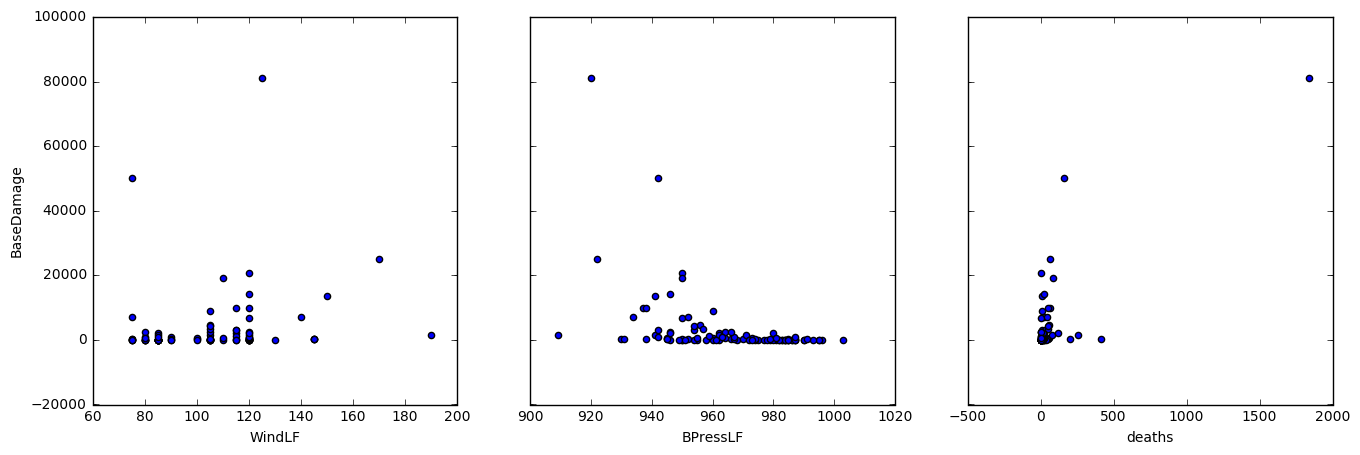

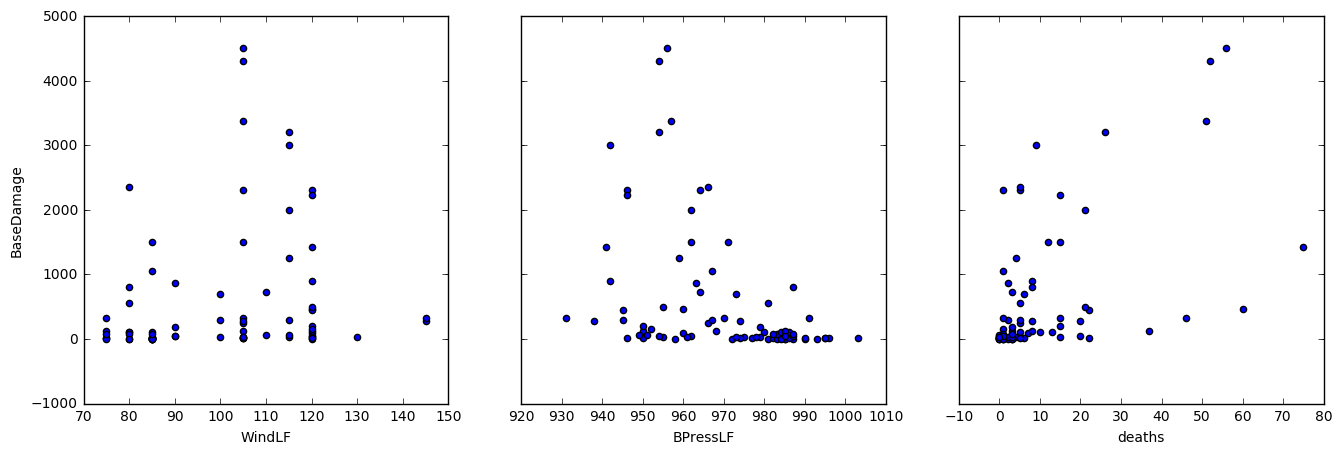

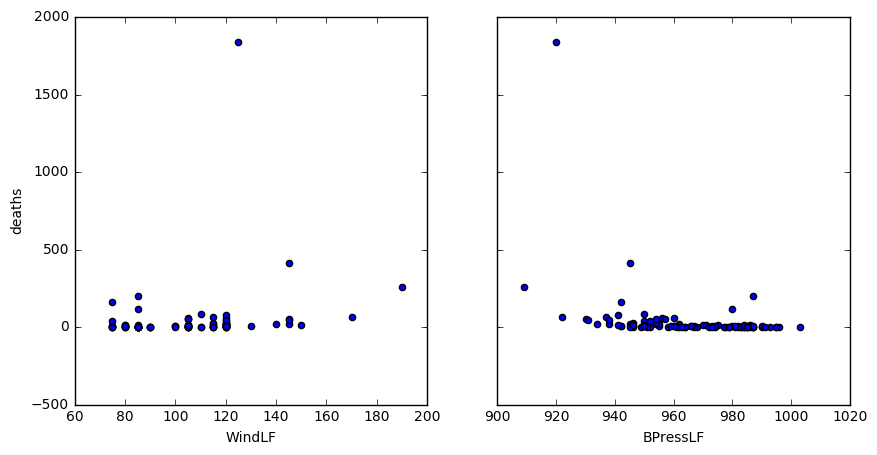

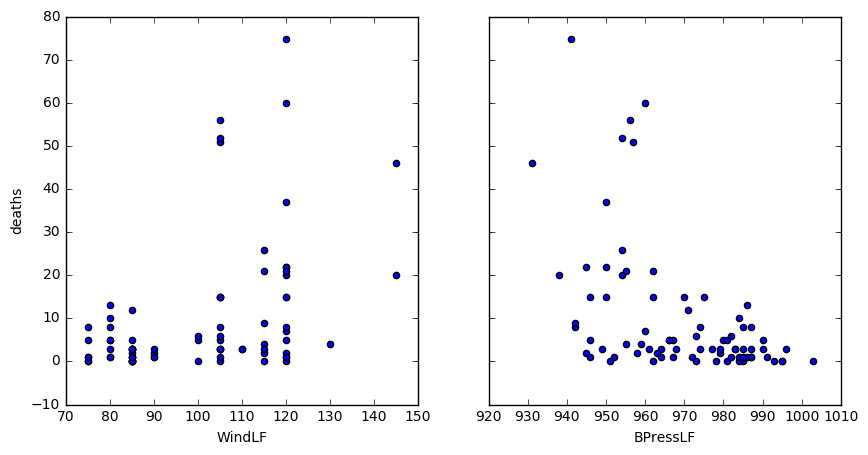

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.show()

#complete set
fig, axs = plt.subplots(1, 3, sharey=True)
mdn.plot(kind='scatter', x='WindLF', y='BaseDamage', ax=axs[0], figsize=(16, 5))
mdn.plot(kind='scatter', x='BPressLF', y='BaseDamage', ax=axs[1])
mdn.plot(kind='scatter', x='deaths', y='BaseDamage', ax=axs[2])

#without outlier set
fig, axs = plt.subplots(1, 3, sharey=True)
mdn2.plot(kind='scatter', x='WindLF', y='BaseDamage', ax=axs[0], figsize=(16, 5))
mdn2.plot(kind='scatter', x='BPressLF', y='BaseDamage', ax=axs[1])
mdn2.plot(kind='scatter', x='deaths', y='BaseDamage', ax=axs[2])

#md.describe()
#md2.describe()
#print len(mdn), len(mdn2)

fig, axs = plt.subplots(1, 2, sharey=True)
mdn.plot(kind='scatter', x='WindLF', y='deaths', ax=axs[0], figsize=(10, 5))
mdn.plot(kind='scatter', x='BPressLF', y='deaths', ax=axs[1])


#without outlier set
fig, axs = plt.subplots(1, 2, sharey=True)
mdn2.plot(kind='scatter', x='WindLF', y='deaths', ax=axs[0], figsize=(10, 5))
mdn2.plot(kind='scatter', x='BPressLF', y='deaths', ax=axs[1])


[<matplotlib.text.Text at 0x11a21b9d0>, <matplotlib.text.Text at 0x11a202890>]

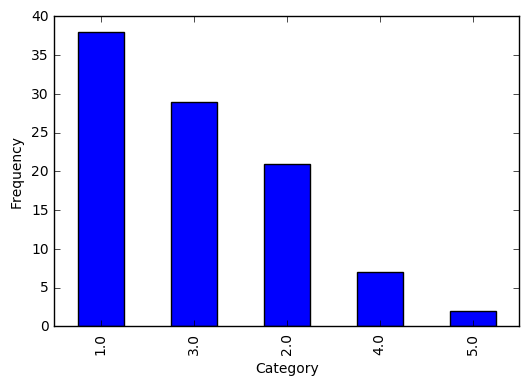

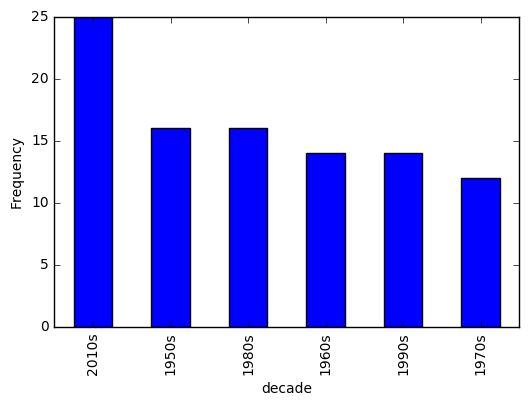

In [10]:
plt.figure();
fig, ax = plt.subplots()
decade_freq = md['hurricane_category'].value_counts().plot(ax=ax, kind='bar')
decade_freq.set(xlabel="Category", ylabel="Frequency")

fig, ax = plt.subplots()
decade_freq = md['decade'].value_counts().plot(ax=ax, kind='bar')
decade_freq.set(xlabel="decade", ylabel="Frequency")



In [11]:
mdn.pivot_table(values=["hurricane_category", "WindLF", "BPressLF", 'deaths', 'BaseDam2104'], index=["decade"], aggfunc=np.mean)

#median
#mdn.pivot_table(values=["hurricane_category", "WindLF", "BPressLF", 'deaths', 'BaseDam2104'], index=["decade"], aggfunc=np.median)


,BPressLF,WindLF,deaths,hurricane_category
decade,,,,
1950s,964.437500,111.875000,48.187500,2.500000
1960s,959.857143,115.714286,36.071429,2.500000
1970s,971.750000,100.000000,15.750000,1.833333
1980s,971.562500,96.562500,6.375000,1.812500
1990s,962.928571,107.142857,15.000000,2.285714
2010s,959.480000,99.400000,97.080000,1.880000


In [12]:
#no outlier data

#mean
mdn2.pivot_table(values=["hurricane_category", "WindLF", "BPressLF", 'deaths', 'BaseDam2014'], index=["decade"], aggfunc=np.mean)

#median
#mdn2.pivot_table(values=["hurricane_category", "WindLF", "BPressLF", 'deaths', 'BaseDam2014'], index=["decade"], aggfunc=np.median)



,BPressLF,BaseDam2014,WindLF,deaths,hurricane_category
decade,,,,,
1950s,964.214286,630.713806,111.428571,11.071429,2.500000
1960s,966.583333,1570.476914,107.083333,16.583333,2.166667
1970s,971.000000,1372.092502,101.363636,6.545455,1.909091
1980s,974.066667,998.534605,93.666667,5.400000,1.666667
1990s,966.076923,1994.597092,102.307692,11.384615,2.076923
2010s,971.500000,1284.380392,89.285714,10.428571,1.357143


In [13]:
mdn.pivot_table(values=["BPressLF", 'deaths', 'BaseDam2014', 'Year'], index=["hurricane_category"], aggfunc=np.median)


,BPressLF,BaseDam2014,Year,deaths
hurricane_category,,,,
1.0,984.5,112.383650,1986.5,3.0
2.0,967.0,1043.570248,1991.0,6.0
3.0,950.0,2703.403994,1980.0,15.0
4.0,938.0,2573.478261,1960.0,21.0
5.0,915.5,25677.680291,1980.5,159.0


In [14]:
mdn.pivot_table(values=["WindLF", 'deaths', 'BaseDam2014', 'Year'], index=["Barometric_Pressure_Quintile"], aggfunc=np.median)


,BaseDam2014,WindLF,Year,deaths
Barometric_Pressure_Quintile,,,,
1,57.776668,85.0,1985.5,1.0
2,146.148148,90.0,1972.0,3.0
3,1154.642527,105.0,1985.0,5.0
4,2429.884153,120.0,1990.0,17.5
5,9167.192371,125.0,1985.0,47.0
